In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_vectors2d(vectors, colors,labels):
    origin = np.zeros((2, len(vectors)))
    fig, ax = plt.subplots()
    a = 0
    ax.axis('equal')
    for i in range(len(vectors)):
        ax.quiver(*origin[:, i], *vectors[i], color=colors[i],scale=1, scale_units='xy', angles='xy',label=labels[i])
        if a<np.max(vectors[i]):
            a = np.max(vectors[i])
    a = a+1
    ax.set_xlim([-a, a])
    ax.set_ylim([-a, a])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.legend()
    plt.show()

# Eigen values and Eigen Vectors

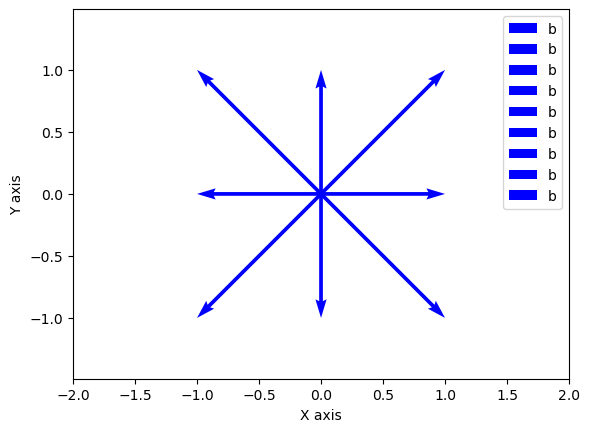

In [3]:
A = np.array([[5,1],[0,-1]])
span_vect = []
for x in np.linspace(-1,1,3):
    for y in np.linspace(-1,1,3):
        span_vect.append(np.array([x,y]))
plot_vectors2d(span_vect,['b']*len(span_vect),['b']*len(span_vect))

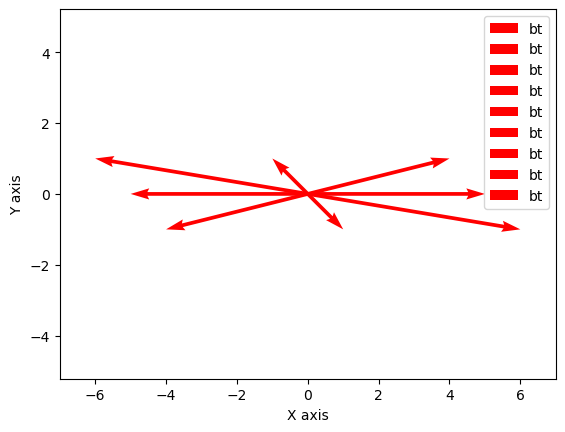

In [4]:
span_vect_t = []
for i in range(len(span_vect)):
    bt = A @ span_vect[i]
    span_vect_t.append(bt)
plot_vectors2d(span_vect_t,['r']*len(span_vect),['bt']*len(span_vect))

In [5]:
E,U = np.linalg.eig(A)
print(E)
print(U)

[ 5. -1.]
[[ 1.         -0.16439899]
 [ 0.          0.98639392]]


In [6]:
Ar = U @ np.diag(E) @np.linalg.inv(U)
print(Ar)

[[ 5.  1.]
 [ 0. -1.]]


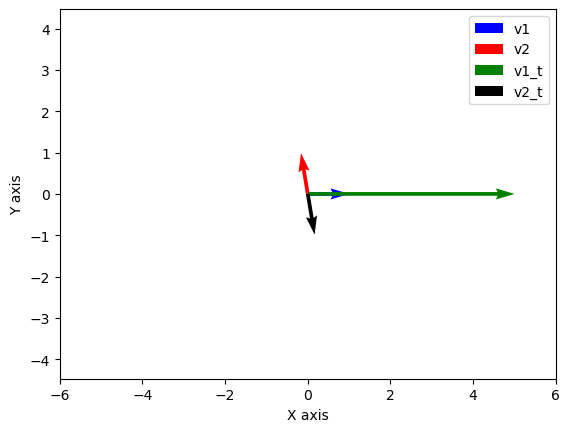

In [7]:
v1 = np.array([U[0,0],U[1,0]])
v2 = np.array([U[0,1],U[1,1]])
v1_t = A @ v1
v2_t = A @ v2
plot_vectors2d([v1,v2,v1_t,v2_t],['b','r','g','k'],['v1','v2','v1_t','v2_t'])

# SVD

In [16]:
R1 = np.array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])
S = np.array([[3, 0], [0, 1]])
R2 = np.array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])
A = R1 @ S @ R2

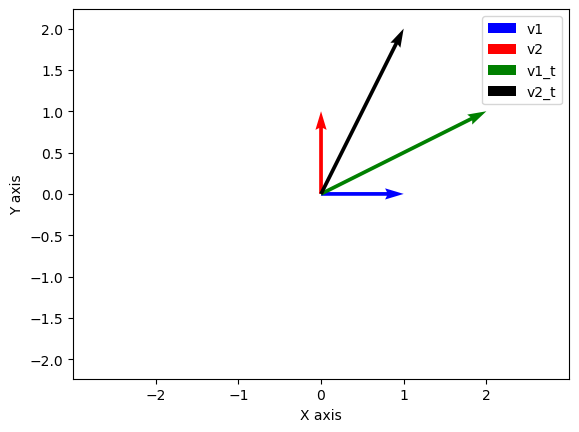

In [17]:
v1 = np.array([1,0])
v2 = np.array([0,1])
v1_t = A @ v1
v2_t = A @ v2
plot_vectors2d([v1,v2,v1_t,v2_t],['b','r','g','k'],['v1','v2','v1_t','v2_t'])

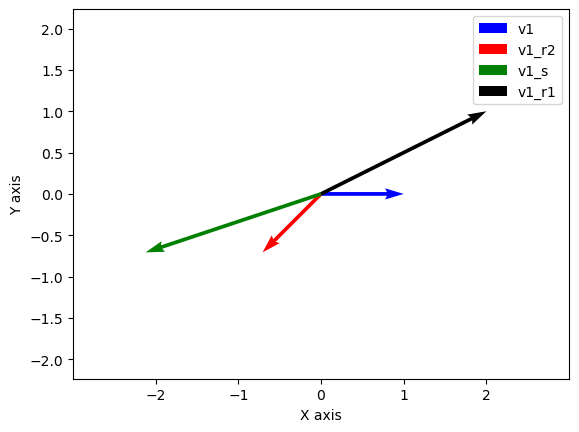

In [18]:
v1 = np.array([1,0])
v1_r2 = R2 @ v1
v1_s = S @ v1_r2
v1_r1 = R1 @ v1_s
plot_vectors2d([v1,v1_r2,v1_s,v1_r1],['b','r','g','k'],['v1','v1_r2','v1_s','v1_r1'])

In [11]:
U,Se,V = np.linalg.svd(A)
Se = np.diag(Se)
print(U)
print(Se)
print(V)

[[1. 0.]
 [0. 1.]]
[[2. 0.]
 [0. 2.]]
[[-1. -0.]
 [-0. -1.]]


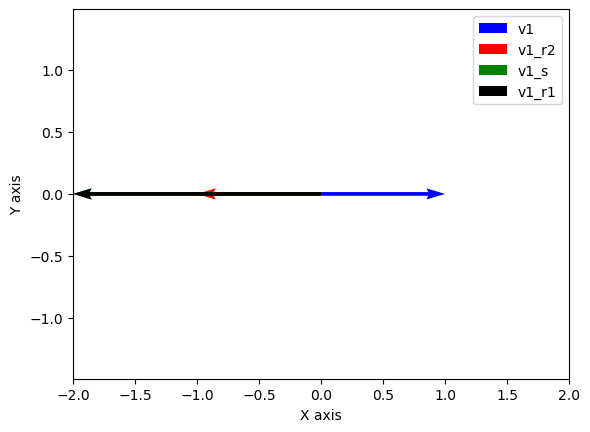

In [12]:
v1 = np.array([1,0])
v1_r2 = V @ v1
v1_s = Se @ v1_r2
v1_r1 = U @ v1_s
plot_vectors2d([v1,v1_r2,v1_s,v1_r1],['b','r','g','k'],['v1','v1_r2','v1_s','v1_r1'])

In [13]:
print(v1)
print(v1_r2)

[1 0]
[-1.  0.]


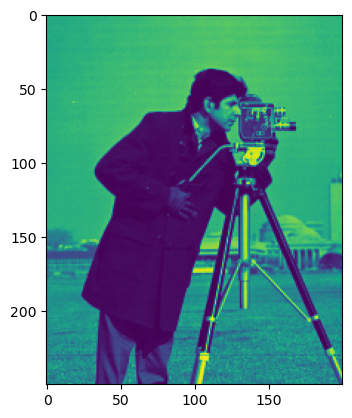

In [14]:
A = plt.imread("cameraman.tif")
A = A[:250,:200]
plt.imshow(A)

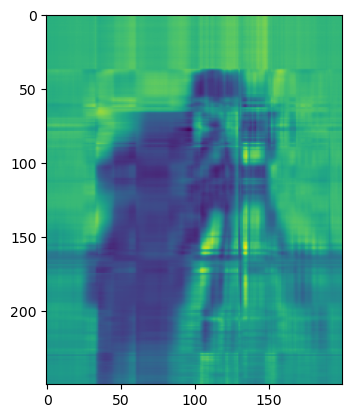

In [15]:
#reduced
U,Se,V = np.linalg.svd(A)
i = 7
A_R = U[:,:i] @ np.diag(Se[:i]) @ V[:i,:]
plt.imshow(A_R)

Estimated parameters using TLS: a = 1.0, b = 0.998405019872782


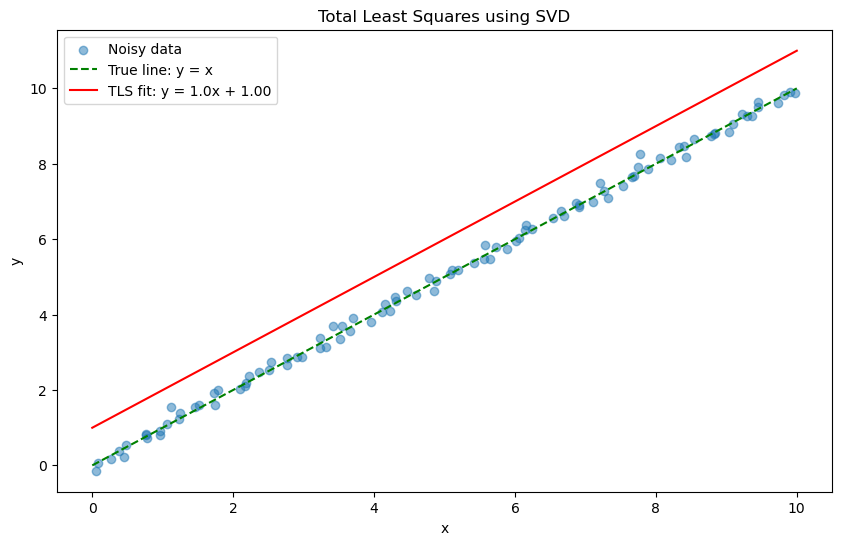

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate y = x points
np.random.seed(42)  # For reproducibility
n_points = 100
x = np.linspace(0, 10, n_points)
y = x

# Step 2: Add noise to both x and y
noise_level = 0.1
x_noisy = x + noise_level * np.random.randn(n_points)
y_noisy = y + noise_level * np.random.randn(n_points)

# Step 3: Formulate the TLS problem
# Construct the data matrix A with noisy x and y
A = np.vstack([x_noisy, y_noisy]).T

# Step 4: Apply SVD
U, S, Vt = np.linalg.svd(A)
V = Vt.T

# The TLS solution is given by the right singular vector corresponding to the smallest singular value
tls_solution = V[:, -1]
a_tls, b_tls = tls_solution[0], tls_solution[1]

# Normalize to get the line equation
b_tls = -b_tls / a_tls
a_tls = 1.0

# Display the results
print(f"Estimated parameters using TLS: a = {a_tls}, b = {b_tls}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x_noisy, y_noisy, label='Noisy data', alpha=0.5)
plt.plot(x, y, 'g--', label='True line: y = x')
plt.plot(x, a_tls * x + b_tls, 'r-', label=f'TLS fit: y = {a_tls}x + {b_tls:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Total Least Squares using SVD')
plt.show()
